# **EDA (Exploratory Data Analysis)** de `The Movies Dataset`

## Data Collection

- Cargar los datos
- Revisar los registros


### **Cargar los datos ([`The Movies Dataset`](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset))**


In [1]:
import zipfile
import os
# descarmaos usando el CLI de kaggle
!kaggle datasets download -d rounakbanik/the-movies-dataset -p data/

# descomprimimos el archivo
with zipfile.ZipFile("./data/the-movies-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("./data")
    
# removemos el archivo zip
os.remove("./data/the-movies-dataset.zip")

# removemos los datasets miniatura<
os.remove("./data/links_small.csv")
os.remove("./data/ratings_small.csv")

/usr/bin/zsh: /home/felipe/miniconda3/envs/tf/lib/libncursesw.so.6: no version information available (required by /usr/bin/zsh)
Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
 99%|███████████████████████████████████████▋| 226M/228M [00:12<00:00, 26.4MB/s]
100%|████████████████████████████████████████| 228M/228M [00:12<00:00, 19.1MB/s]


No se usaran los dataset `ratings_small.csv` (100k) y `links_small.csv` (9k), debido a que solo son versiones mas pequeñas de `ratings.csv` (25M) y `links.csv` (45k)

Leemos con pandas cada uno de los datasets


In [2]:
import pandas as pd

df_credits = pd.read_csv("./data/credits.csv")
df_keywords = pd.read_csv("./data/keywords.csv")
df_links = pd.read_csv("./data/links.csv")
df_movies_metada = pd.read_csv("./data/movies_metadata.csv")
df_ratings = pd.read_csv("./data/ratings.csv")

/tmp/ipykernel_14253/747569795.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies_metada = pd.read_csv("./data/movies_metadata.csv")


### **Revisar los registros**


In [3]:
# cambiar ancho de output del notebook
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("max_colwidth", 80)

#### `credits.csv`


In [4]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
df_credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a3684...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gende...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gend...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gende...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', 'gende...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c7...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gender': ...",11862


In [6]:
# Observamos que la columna "cast" es un string que contiene una lista de diccionarios
df_credits["cast"][:5]

0    [{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a3684...
1    [{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f...
2    [{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75...
3    [{'cast_id': 1, 'character': "Savannah 'Vannah' Jackson", 'credit_id': '52fe...
4    [{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c7...
Name: cast, dtype: object

In [7]:
# Observamos que la columna "crew" es un string que contiene una lista de diccionarios
df_credits["crew"][:5]

0    [{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gende...
1    [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gend...
2    [{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gende...
3    [{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', 'gende...
4    [{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gender': ...
Name: crew, dtype: object

#### `keywords.csv`


In [8]:
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [9]:
df_keywords.head(5)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, ..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392, 'name': 'best friend'}, {'id..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id': 10131, 'name': 'interracial r..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'name': 'midlife crisis'}, {'id'..."


In [10]:
# Observamos que la columna "keywords" es un string que contiene una lista de diccionarios
df_keywords["keywords"][:5]

0    [{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, ...
1    [{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}...
2    [{'id': 1495, 'name': 'fishing'}, {'id': 12392, 'name': 'best friend'}, {'id...
3    [{'id': 818, 'name': 'based on novel'}, {'id': 10131, 'name': 'interracial r...
4    [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'name': 'midlife crisis'}, {'id'...
Name: keywords, dtype: object

#### `links.csv`


In [11]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [12]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#### `movies_metadata.csv`


In [13]:
df_movies_metada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [14]:
df_movies_metada.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lV...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday bri...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 1075...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that opens the...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 255...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'França...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


#### `ratings.csv`


In [15]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [16]:
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [17]:
def see_movies_len():
    print("df_ratings", set(df_ratings["movieId"].values).__len__())
    print("df_movies_metadata", set(df_movies_metada["id"].values).__len__())
    print("df_keywords", set(df_keywords["id"].values).__len__())
    print("df_links", set(df_links["movieId"].values).__len__())
    print("df_credits", set(df_credits["id"].values).__len__())

In [18]:
see_movies_len()

df_ratings 45115
df_movies_metadata 45436
df_keywords 45432
df_links 45843
df_credits 45432


## Data Exploration

- Revisar los tipos de datos
- Revisar los valores nulos
- Revisar los valores duplicados
- Revisar las estadísticas básicas


Creamos la funcion para saber que columnas tienen valores nulos


In [19]:
def find_columns_null(df):
    columns_null = df.columns[df.isnull().any()].tolist()
    return columns_null

#### `credits.csv`


In [20]:
# Revisamos la cantidad de columnas y filas
df_credits.shape

(45476, 3)

In [21]:
# Revisamos los tipos de datos
df_credits.dtypes

cast    object
crew    object
id       int64
dtype: object

In [22]:
# Revisamos los valores unicos
df_credits.nunique()

cast    43019
crew    44669
id      45432
dtype: int64

In [23]:
# Revisamos los valores nulos
df_credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [24]:
# Revisamos las datos duplicados
df_credits.duplicated().sum()

37

#### `keywords.csv`


In [25]:
# Revisamos la cantidad de columnas y filas
df_keywords.shape

(46419, 2)

In [26]:
# Revisamos los tipos de datos
df_keywords.dtypes

id           int64
keywords    object
dtype: object

In [27]:
# Revisamos los valores unicos
df_keywords.nunique()

id          45432
keywords    25989
dtype: int64

In [28]:
# Revisamos los valores nulos
df_keywords.isnull().sum()

id          0
keywords    0
dtype: int64

In [29]:
# Revisamos las datos duplicados
df_keywords.duplicated().sum()

987

#### `links.csv`


In [30]:
# Revisamos la cantidad de columnas y filas
df_links.shape

(45843, 3)

In [31]:
# Revisamos los tipos de datos
df_links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [32]:
# Revisamos los valores unicos
df_links.nunique()

movieId    45843
imdbId     45843
tmdbId     45594
dtype: int64

In [33]:
# Revisamos los valores nulos
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [34]:
# Revisamos las datos duplicados
df_links.duplicated().sum()

0

#### `movies_metadata.csv`


In [35]:
# Revisamos la cantidad de columnas y filas
df_movies_metada.shape

(45466, 24)

In [36]:
# Revisamos los tipos de datos
df_movies_metada.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [37]:
# Revisamos las columnas numericas
df_movies_metada.select_dtypes(include=["int64", "float64"]).describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [38]:
# Revisamos los valores unicos
df_movies_metada.nunique()

adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               44176
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64

In [39]:
# Revisamos los valores nulos
df_movies_metada.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [40]:
find_columns_null(df_movies_metada)

['belongs_to_collection',
 'homepage',
 'imdb_id',
 'original_language',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [41]:
# Revisamos las datos duplicados
df_movies_metada.duplicated().sum()

13

#### `ratings.csv`


In [42]:
# Revisamos la cantidad de columnas y filas
df_ratings.shape

(26024289, 4)

In [43]:
# Revisamos los tipos de datos
df_ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [44]:
# Revisamos los valores unicos
df_ratings.nunique()

userId         270896
movieId         45115
rating             10
timestamp    20549435
dtype: int64

In [45]:
# Revisamos los valores nulos
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [46]:
# Revisamos las datos duplicados
df_ratings.duplicated().sum()

0

## Data Preprocessing

- Eliminar columnas innecesarias
- Eliminar registros con valores nulos
- Eliminar registros duplicados
- Convertir los tipos de datos


Creamos una funcion para limpiar los datos


In [47]:
from ast import literal_eval
from typing import Callable

# funcion para obtener los valores de un string
def extract_info(text, obj: str = "name", func: Callable = lambda _: True):
    # Si el texto es un string sin nada que evaluar
    try:
        text = literal_eval(text)
    except:
        return text
    # Si el texto es un diccionario
    if type(text) == dict:
        return text[obj]
    # Si el texto es una lista
    if type(text) == list:
        if len(text) == 0: # Si la lista esta vacia
            return "Others"
        if len(text) == 1: # Si la lista tiene un solo elemento
            for i in text:
                return i[obj]
        else: # Si la lista tiene mas de un elemento
            s = [] # lista para almacenar los valores
            for i in text:
                if func(i):  # si la funcion es verdadera
                    s.append(i[obj]) # agregamos el valor a la lista
            return ", ".join(s) # retornamos la lista como un string

#### `credits.csv`


In [48]:
df_credits.shape

(45476, 3)

In [49]:
df_credits.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a3684...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gende...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gend...",8844


Primero eliminamos los valores duplicados, ya que nulos no existen


In [50]:
df_credits = df_credits.drop_duplicates()
df_credits.shape

(45439, 3)

Obtenemos `character`, `actors`, `director` de las columnas `cast` y `crew` en dict para poder revisar la data


In [51]:
df_credits["characters"] = df_credits["cast"].apply(
    extract_info, obj="character"
)  # personajes
df_credits["actors"] = df_credits["cast"].apply(extract_info)  # actores

# obtenemos el director
df_credits["director"] = df_credits["crew"].apply(
    extract_info, args=("name", lambda x: x["job"] == "Director")
)

# obtenemos los guionistas
df_credits["crew"] = df_credits["crew"].apply(
    extract_info, args=("name", lambda x: x["job"] != "Director")
)

Reorganizamos las columnas


In [52]:
# Removemos las columnas innecesarias
df_credits = df_credits.drop(columns=["cast"])

# Cambiamos el orden de las columnas
df_credits = df_credits[["id", "characters", "actors", "director", "crew"]]

In [53]:
df_credits.head(2)

,id,characters,actors,director,crew
0,862,"Woody (voice), Buzz Lightyear (voice), Mr. Potato Head (voice), Slinky Dog (...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney, Wallace Shawn, John Ratzenber...",John Lasseter,"Joss Whedon, Andrew Stanton, Joel Cohen, Alec Sokolow, Bonnie Arnold, Ed Cat..."
1,8844,"Alan Parrish, Samuel Alan Parrish / Van Pelt, Judy Sheperd, Peter Shepherd, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, Bradley Pierce, Bonnie Hunt, B...",Joe Johnston,"Larry J. Franco, Jonathan Hensleigh, James Horner, Robert Dalva, Nancy Foy, ..."


In [54]:
# Guardamos el dataset limpio
df_credits.to_csv("./data_clean/credits.csv", index=False)

#### `keywords.csv`


In [55]:
# Revisamos la cantidad de columnas y filas
df_keywords.shape

(46419, 2)

In [56]:
df_keywords.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, ..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}..."


Ahora eliminamos los valores duplicados, ya que nulos no existen


In [57]:
df_keywords = df_keywords.drop_duplicates()
df_keywords.shape

(45432, 2)

Obtenemos las `keywords` en dict para poder revisar la data


In [58]:
df_keywords["keywords"] = df_keywords["keywords"].apply(extract_info)

Reorganizamos las columnas


In [59]:
df_keywords.head(2)

,id,keywords
0,862,"jealousy, toy, boy, friendship, friends, rivalry, boy next door, new toy, to..."
1,8844,"board game, disappearance, based on children's book, new home, recluse, gian..."


In [60]:
# Guardamos el dataset limpio
df_keywords.to_csv("./data_clean/keywords.csv", index=False)

#### `links.csv`


In [61]:
df_links.shape

(45843, 3)

In [62]:
df_links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

Primero convertimos `tmdbId` de float64 a int64


In [63]:
df_links["tmdbId"] = df_links["tmdbId"].astype("Int64")
df_links.dtypes

movieId    int64
imdbId     int64
tmdbId     Int64
dtype: object

Ahora procesaremos los valores nulos, ya que duplicados no existen


In [64]:
df_links["movieId"].duplicated().sum()

0

In [65]:
df_links[df_links["tmdbId"].isnull()]

,movieId,imdbId,tmdbId
140,142,94878,<NA>
598,604,115978,<NA>
708,720,118114,<NA>
709,721,114103,<NA>
718,730,125877,<NA>
...,...,...,...
24673,115254,21733,<NA>
24775,115715,3670792,<NA>
24802,115821,3900116,<NA>
28570,128734,4438688,<NA>


In [66]:
df_links["tmdbId"] = df_links["tmdbId"].fillna(-1)

In [67]:
df_links.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [68]:
# Guardar el dataset limpio
df_links.to_csv("./data_clean/links.csv", index=False)

#### `movies_metadata.csv`


In [69]:
df_movies_metada.shape

(45466, 24)

In [70]:
df_movies_metada.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lV...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday bri...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 1075...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that opens the...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 255...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'França...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


Antes de nada eliminamos unos datos raro en el datset


In [71]:
df_movies_metada[df_movies_metada["belongs_to_collection"] == "0.065736"]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}, {'name': 'Vision View Entert...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'LU', 'name': 'Luxem...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_movies_metada[df_movies_metada["belongs_to_collection"] == "2.185485"]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
35587,Avalanche Sharks tells the story of a bikini contest that turns into a horr...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'name': 'Pulser Productions', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_movies_metada[df_movies_metada["belongs_to_collection"] == "1.931659"]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
29503,Rune Balot goes to a casino connected to the October corporation to try to ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'GoHands', 'id': 7759}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'J...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
index_corrupted = df_movies_metada[
    df_movies_metada["belongs_to_collection"] == "0.065736"
].index
df_movies_metada = df_movies_metada.drop(index_corrupted)

index_corrupted = df_movies_metada[
    df_movies_metada["belongs_to_collection"] == "2.185485"
].index
df_movies_metada = df_movies_metada.drop(index_corrupted)

index_corrupted = df_movies_metada[
    df_movies_metada["belongs_to_collection"] == "1.931659"
].index
df_movies_metada = df_movies_metada.drop(index_corrupted)

Ahora procesaremos los datos nulos de cada columna (Categorica)


In [75]:
find_columns_null(df_movies_metada)

['belongs_to_collection',
 'homepage',
 'imdb_id',
 'original_language',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [76]:
# belongs_to_collection
df_movies_metada["belongs_to_collection"].fillna(
    "{'name': 'No'}", inplace=True)
df_movies_metada["belongs_to_collection"] = df_movies_metada[
    "belongs_to_collection"
].apply(extract_info)

/tmp/ipykernel_14253/3489209096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["belongs_to_collection"].fillna(


In [77]:
# genres
df_movies_metada["genres"].fillna("No", inplace=True)
df_movies_metada["genres"] = df_movies_metada["genres"].apply(extract_info)

/tmp/ipykernel_14253/1692292736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["genres"].fillna("No", inplace=True)


In [78]:
# production_companies
df_movies_metada["production_companies"].fillna("No", inplace=True)
df_movies_metada["production_companies"] = df_movies_metada[
    "production_companies"
].apply(extract_info)

/tmp/ipykernel_14253/1140996038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["production_companies"].fillna("No", inplace=True)


In [79]:
# spoken_languages
df_movies_metada["spoken_languages"].fillna("No", inplace=True)
df_movies_metada["spoken_languages"] = df_movies_metada["spoken_languages"].apply(extract_info)

/tmp/ipykernel_14253/2999311994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["spoken_languages"].fillna("No", inplace=True)


In [80]:
# tag_line
df_movies_metada["tagline"].fillna("No", inplace=True)

/tmp/ipykernel_14253/2381070869.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["tagline"].fillna("No", inplace=True)


In [81]:
# status
df_movies_metada["status"].fillna("No", inplace=True)

/tmp/ipykernel_14253/1802852726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["status"].fillna("No", inplace=True)


In [82]:
# original_language
df_movies_metada["original_language"].fillna("No", inplace=True)

/tmp/ipykernel_14253/4048095858.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["original_language"].fillna("No", inplace=True)


In [83]:
# overview
df_movies_metada["overview"].fillna("No", inplace=True)

/tmp/ipykernel_14253/3037612309.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["overview"].fillna("No", inplace=True)


In [84]:
find_columns_null(df_movies_metada)

['homepage',
 'imdb_id',
 'popularity',
 'poster_path',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [85]:
df_movies_metada.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation, Comedy, Family",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday bri...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Pixar Animation Studios,"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,English,Released,No,Toy Story,False,7.7,5415.0
1,False,No,65000000,"Adventure, Fantasy, Family",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that opens the...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"TriStar Pictures, Teitler Film, Interscope Communications","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"English, Français",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


Ahora procesaremos los datos nulos de cada columna (Numericas)


In [86]:
find_columns_null(df_movies_metada)

['homepage',
 'imdb_id',
 'popularity',
 'poster_path',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [87]:
df_movies_metada[find_columns_null(df_movies_metada)].dtypes

homepage                 object
imdb_id                  object
popularity               object
poster_path              object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
title                    object
video                    object
vote_average            float64
vote_count              float64
dtype: object

In [88]:
# popularity
df_movies_metada["popularity"] = df_movies_metada["popularity"].astype(
    "float"
)  # convert to float

df_movies_metada["popularity"].fillna(
    df_movies_metada["popularity"].median(), inplace=True
)  # clean the nulls

/tmp/ipykernel_14253/859975817.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["popularity"].fillna(


In [89]:
# release_date
df_movies_metada["release_date"] = pd.to_datetime(
    df_movies_metada["release_date"], errors="coerce"
)  # convert to datetime


df_movies_metada["release_date"].fillna(
    df_movies_metada["release_date"].mode()[0], inplace=True
)  # clean nulls

/tmp/ipykernel_14253/1461240623.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["release_date"].fillna(


In [90]:
# revenue
df_movies_metada["revenue"] = df_movies_metada["revenue"].astype(
    "float"
)  # convert to float

df_movies_metada["revenue"].fillna(
    df_movies_metada["revenue"].median(), inplace=True
)  # clean nulls

/tmp/ipykernel_14253/3792690084.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["revenue"].fillna(


In [91]:
# runtime
df_movies_metada["runtime"] = df_movies_metada["runtime"].astype(
    "float"
)  # convert to float

df_movies_metada["runtime"].fillna(
    df_movies_metada["runtime"].mean(), inplace=True
)  # clean nulls

/tmp/ipykernel_14253/3076450320.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["runtime"].fillna(


In [92]:
# vote_average
df_movies_metada["vote_average"].fillna(
    df_movies_metada["vote_average"].mean(), inplace=True
)  # clean nulls

df_movies_metada["vote_average"] = df_movies_metada["vote_average"].astype(
    "float"
)  # convert to float

/tmp/ipykernel_14253/366417307.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["vote_average"].fillna(


In [93]:
# vote_count
df_movies_metada["vote_count"].fillna(
    df_movies_metada["vote_count"].median(), inplace=True
)  # clean nulls
df_movies_metada["vote_count"] = df_movies_metada["vote_count"].astype(
    "int64"
)  # convert to int

/tmp/ipykernel_14253/1678368580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metada["vote_count"].fillna(


In [94]:
find_columns_null(df_movies_metada)

['homepage',
 'imdb_id',
 'poster_path',
 'production_countries',
 'title',
 'video']

Ordenamos las columnas


In [95]:
# # ORdenamos las columnas
# df_movies_metada = df_movies_metada[
#     [
#         "id",
#         "adult",
#         "homepage",
#         "imdb_id",
#         "poster_path",
#         "belongs_to_collection",
#         "budget",
#         "genres",
#         "original_language",
#         "overview",
#         "popularity",
#         "production_companies",
#         "release_date",
#         "revenue",
#         "runtime",
#         "spoken_languages",
#         "status",
#         "tagline",
#         "vote_average",
#         "vote_count",
#     ]
# ]

In [96]:
df_movies_metada.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation, Comedy, Family",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday bri...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Pixar Animation Studios,"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,English,Released,No,Toy Story,False,7.7,5415


In [97]:
df_movies_metada["id"] = df_movies_metada["id"].astype("int64")

In [98]:
# guardar el dataset limpio
df_movies_metada.to_csv("./data_clean/movies_metadata.csv", index=False)

#### `ratings.csv`

In [99]:
df_ratings.shape

(26024289, 4)

In [100]:
df_ratings.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [101]:
df_ratings.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


#### `data_clean.csv`

In [102]:
see_movies_len()

df_ratings 45115
df_movies_metadata 45433
df_keywords 45432
df_links 45843
df_credits 45432


In [103]:
# Creamos un dataset de keyword con credits
df_key_cred = pd.merge(df_keywords, df_credits, how="inner", on="id")
df_key_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45439 entries, 0 to 45438
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          45439 non-null  int64 
 1   keywords    45439 non-null  object
 2   characters  45439 non-null  object
 3   actors      45439 non-null  object
 4   director    45439 non-null  object
 5   crew        45439 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [104]:
# Ahora creamos un dataset de movie_metada con df_key_cred
df_key_cred_meta = pd.merge(df_key_cred, df_movies_metada, how="inner", on="id")
df_key_cred_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45476 non-null  int64         
 1   keywords               45476 non-null  object        
 2   characters             45476 non-null  object        
 3   actors                 45476 non-null  object        
 4   director               45476 non-null  object        
 5   crew                   45476 non-null  object        
 6   adult                  45476 non-null  object        
 7   belongs_to_collection  45476 non-null  object        
 8   budget                 45476 non-null  object        
 9   genres                 45476 non-null  object        
 10  homepage               7779 non-null   object        
 11  imdb_id                45459 non-null  object        
 12  original_language      45476 non-null  object        
 13  o

In [105]:
# df_key_cred_meta.to_csv("./data_clean/data_clean.csv", index=False)
df_key_cred_meta.to_json("./data_clean/data_clean.json", orient="records")


In [141]:
df_ratings["movieId"].unique().__len__()

45115

In [151]:
# Ahora creamos el nuevo dataset de ratings
set_movies = df_key_cred_meta["id"].copy()
set(set_movies).__len__()

45432

In [143]:
new_ratings = df_ratings.merge(set_movies, how="left", left_on="movieId", right_on="id").dropna()
new_ids = new_ratings["id"].copy()
del new_ratings["id"]
new_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11439709 entries, 0 to 26027425
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 436.4 MB


In [152]:
new_ratings["movieId"].unique().__len__()

7565

In [108]:
new_ratings.to_csv("./data_clean/ratings.csv", index=False)

In [153]:
# now filter df_key_cred_meta
new_df_key_cred_meta = df_key_cred_meta.query("id in @new_ids")
new_df_key_cred_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7573 entries, 0 to 45472
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     7573 non-null   int64         
 1   keywords               7573 non-null   object        
 2   characters             7573 non-null   object        
 3   actors                 7573 non-null   object        
 4   director               7573 non-null   object        
 5   crew                   7573 non-null   object        
 6   adult                  7573 non-null   object        
 7   belongs_to_collection  7573 non-null   object        
 8   budget                 7573 non-null   object        
 9   genres                 7573 non-null   object        
 10  homepage               1303 non-null   object        
 11  imdb_id                7571 non-null   object        
 12  original_language      7573 non-null   object        
 13  origina

In [163]:
#delete duplicateds movies by id
new_df_key_cred_meta = new_df_key_cred_meta.drop_duplicates(subset=["id"])

In [176]:
new_df_key_cred_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7565 entries, 0 to 45472
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     7565 non-null   int64         
 1   keywords               7565 non-null   object        
 2   characters             7565 non-null   object        
 3   actors                 7565 non-null   object        
 4   director               7565 non-null   object        
 5   crew                   7565 non-null   object        
 6   adult                  7565 non-null   object        
 7   belongs_to_collection  7565 non-null   object        
 8   budget                 7565 non-null   object        
 9   genres                 7565 non-null   object        
 10  homepage               1303 non-null   object        
 11  imdb_id                7563 non-null   object        
 12  original_language      7565 non-null   object        
 13  origina

In [177]:
new_df_key_cred_meta.to_json("./data_clean/data_clean.json", orient="records")

## Data Visualization

- Visualizar los datos
- Visualizar la correlación


In [109]:
import random

def generate_rgb():
    # Generar valores RGB aleatorios
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)

    # Convertir los valores RGB a formato hexadecimal
    color_hex = "#{:02x}{:02x}{:02x}".format(r, g, b)

    return color_hex

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [111]:
df_movies_metada["id"] = df_movies_metada["id"].astype("int64")
df = df_movies_metada.merge(df_keywords, on="id").merge(
    df_credits, on="id")
df["budget"] = df["budget"].astype(float)
df["revenue"] = df["revenue"].astype(float)

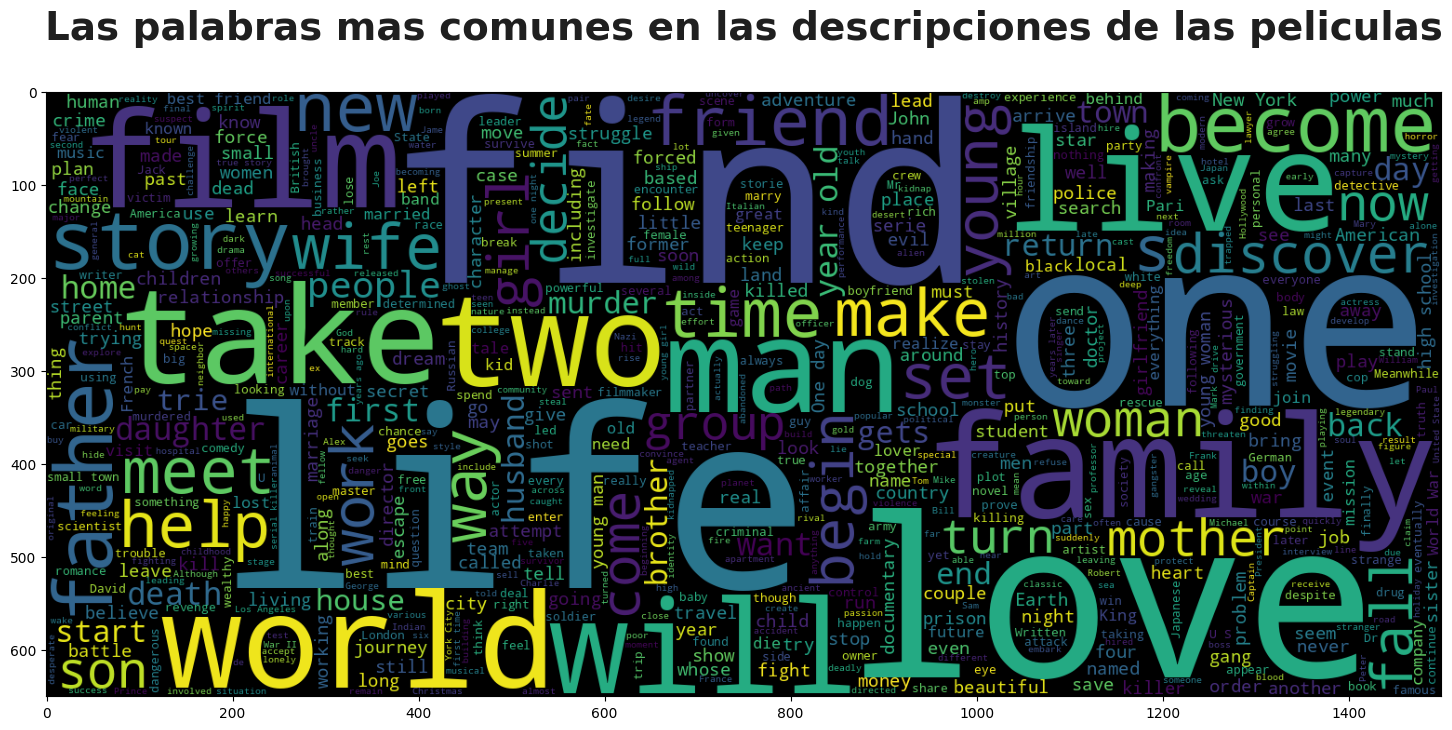

In [112]:
plt.figure(figsize=(18, 18))  # tamaño de la figura
plt.title(
    "Las palabras mas comunes en las descripciones de las peliculas\n",
    fontsize=28,
    weight=600,
    color="#1f1f1f",
)
# Generar la nube de palabras
wordcloud = WordCloud(max_words=1000, min_font_size=10, height=650, width=1500).generate(
    " ".join(df["overview"])
)

# Mostrar la nube de palabras
plt.imshow(wordcloud)

Es interesante notar que palabras como "life", "one", "find", "love", "story" y "world" son recurrentes en las descripciones de las películas. La frecuencia de estas palabras podría indicar que estas temáticas son centrales en muchas películas del conjunto de datos.

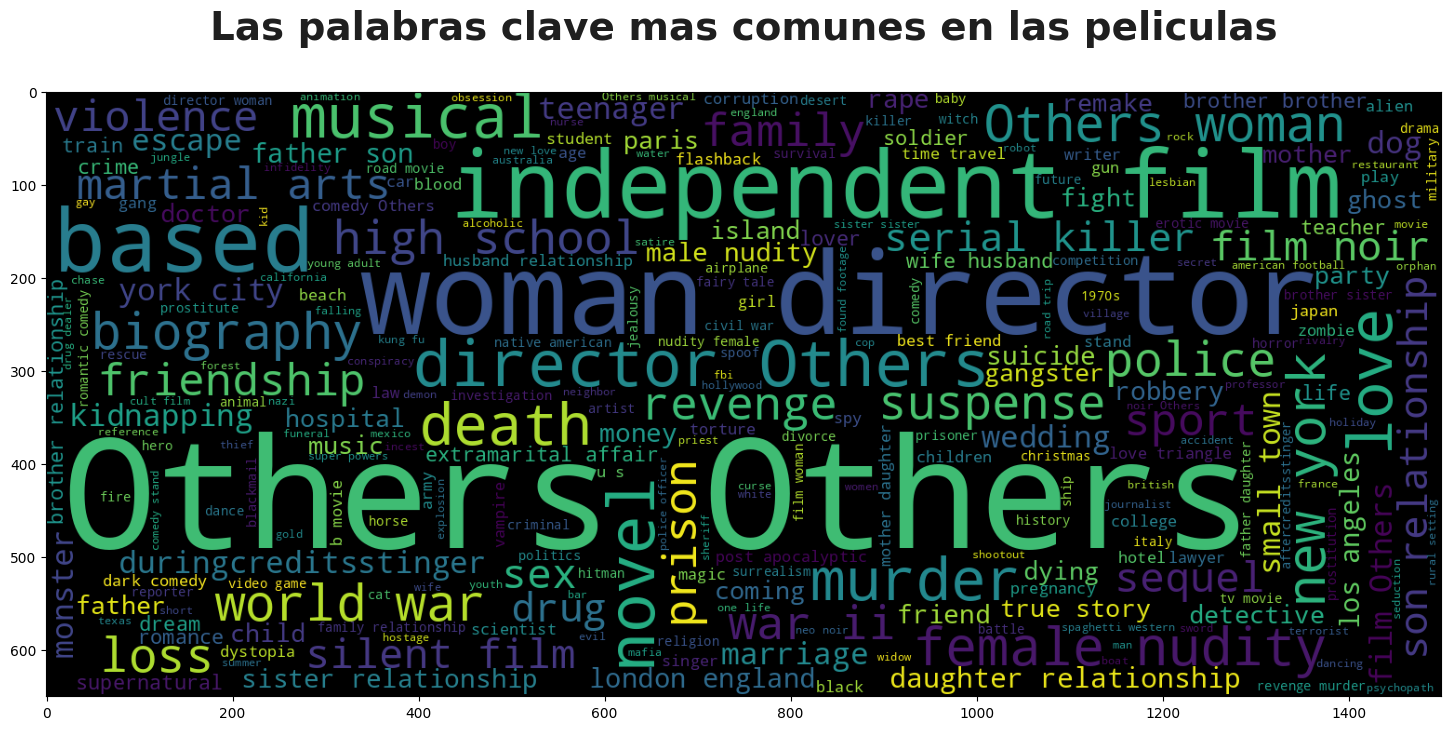

In [113]:
plt.figure(figsize=(18, 18))  # tamaño de la figura
plt.title(
    "Las palabras clave mas comunes en las peliculas\n",
    fontsize=28,
    weight=600,
    color="#1f1f1f",
)
wordcloud = WordCloud(
    max_words=1000, min_font_size=10, height=650, width=1500
).generate(" ".join(df["keywords"]))

plt.imshow(X=wordcloud)

Se puede observar que palabras como "director", "woman", "independent film", "based" y "highschool" son frecuentes en las palabras clave de las películas. Estas palabras indican temas y características específicas que son relevantes en el contexto del cine. Por ejemplo, "director" sugiere la importancia del rol del director en la película, "woman" podría indicar la presencia de personajes femeninos destacados, "independent film" señala películas producidas de manera independiente fuera de los estudios principales, "based" podría referirse a películas basadas en eventos reales o libros, y "highschool" indica historias ambientadas en escuelas secundarias. Estos temas y elementos pueden ser importantes para segmentar y comprender mejor las películas en términos de género, audiencia objetivo y estilo cinematográfico.

Text(0.5, 1.0, 'Cantidad de peliculas estrenadas por año')

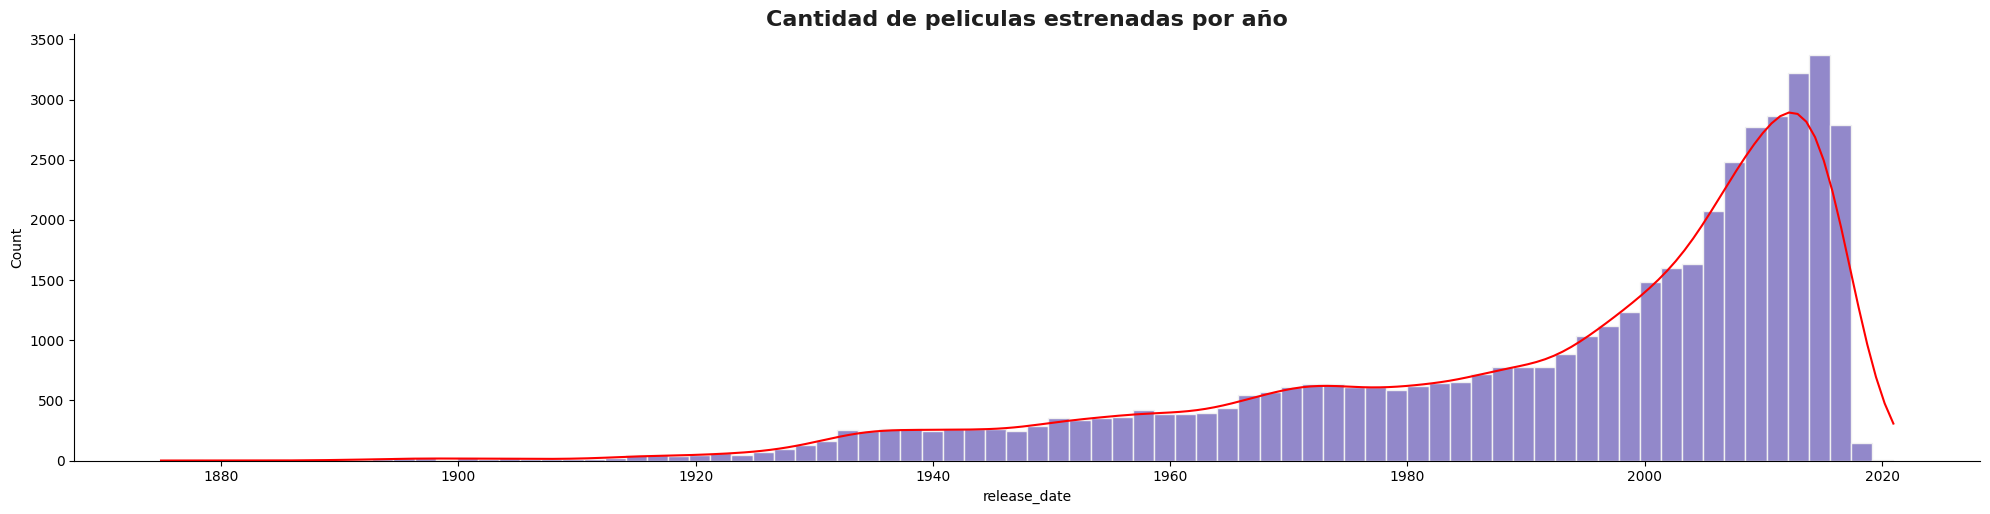

In [114]:
# Generar un grafico de barras con los generos mas comunes
sns.displot(
    data=df,
    x="release_date",
    kind="hist",
    kde=True,
    facecolor=generate_rgb(),
    edgecolor="#f1f1f1",
    line_kws={"lw": 1.5},
    color="red",
    aspect=4,
)
plt.title(
    "Cantidad de peliculas estrenadas por año", fontsize=16, weight=700, color="#1f1f1f"
)

Desde 1930, la industria cinematográfica ha experimentado un crecimiento significativo durante los últimos 50 años. Asimismo, la disminución en el número total de películas estrenadas alrededor de 2020 puede atribuirse al hecho de que el conjunto de datos solo contiene datos limitados de esos años .

(-1.25, 1.25, -1.25, 1.25)

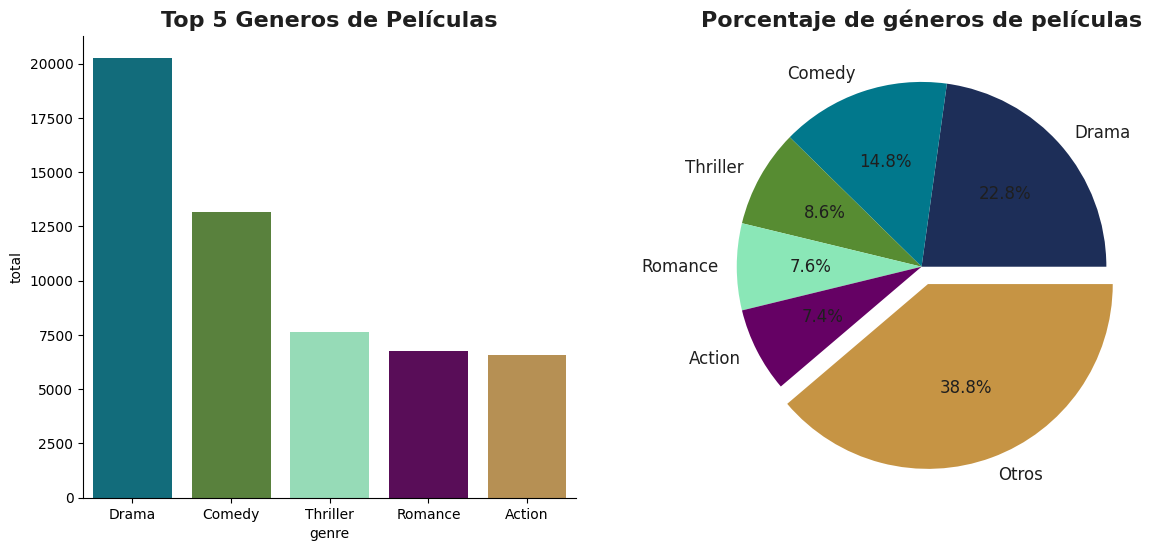

In [115]:
# Preparamos los datos
genres_list: list[str] = df["genres"].apply(lambda x: x.split(", ")).sum()
colors: list[str] = [
    generate_rgb(),
    generate_rgb(),
    generate_rgb(),
    generate_rgb(),
    generate_rgb()
]

# Organizamos los datos
df_top = pd.DataFrame(Counter(genres_list).most_common(5), columns=["genre", "total"])
df_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)  # type: ignore

# Ahora graficamos el grafico de barras de las top 5
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Grafico de barras
ax = sns.barplot(
    data=df_top,
    x="genre",
    y="total",
    ax=axes[0],
    palette=colors,
    hue="genre",
    legend=False
)
ax.set_title("Top 5 Generos de Películas", fontsize=16, weight=600, color="#1f1f1f")
sns.despine() # removemos los bordes

# Ahora graficamos el grafico circular de las top 5 y otros
df_top.loc[len(df_top)] = {"genre": "Otros", "total": df_full[6:].sum()[0]}  # type: ignore
plt.title(
    "Porcentaje de géneros de películas", fontsize=16, weight=600, color="#1f1f1f"
)

colors.insert(0, generate_rgb()) # insertamos un color para "Otros"
axes[1].pie(
    x=df_top["total"],
    labels=df_top["genre"],
    autopct="%1.1f%%",
    textprops=dict(color="#1f1f1f", fontsize=12),
    explode=[0, 0, 0, 0, 0, 0.1],
    colors=colors
)
axes[1].axis("off")

El género drama destaca como el más dominante, con más de 20,000 películas en el conjunto de datos.Aunque los cinco géneros principales son prominentes, todavía existen numerosos géneros adicionales en el conjunto de datos, representando el 38.8% del total de géneros cinematográficos.

Text(0.5, 1.0, 'La relacion entre Rating y Popularidad')

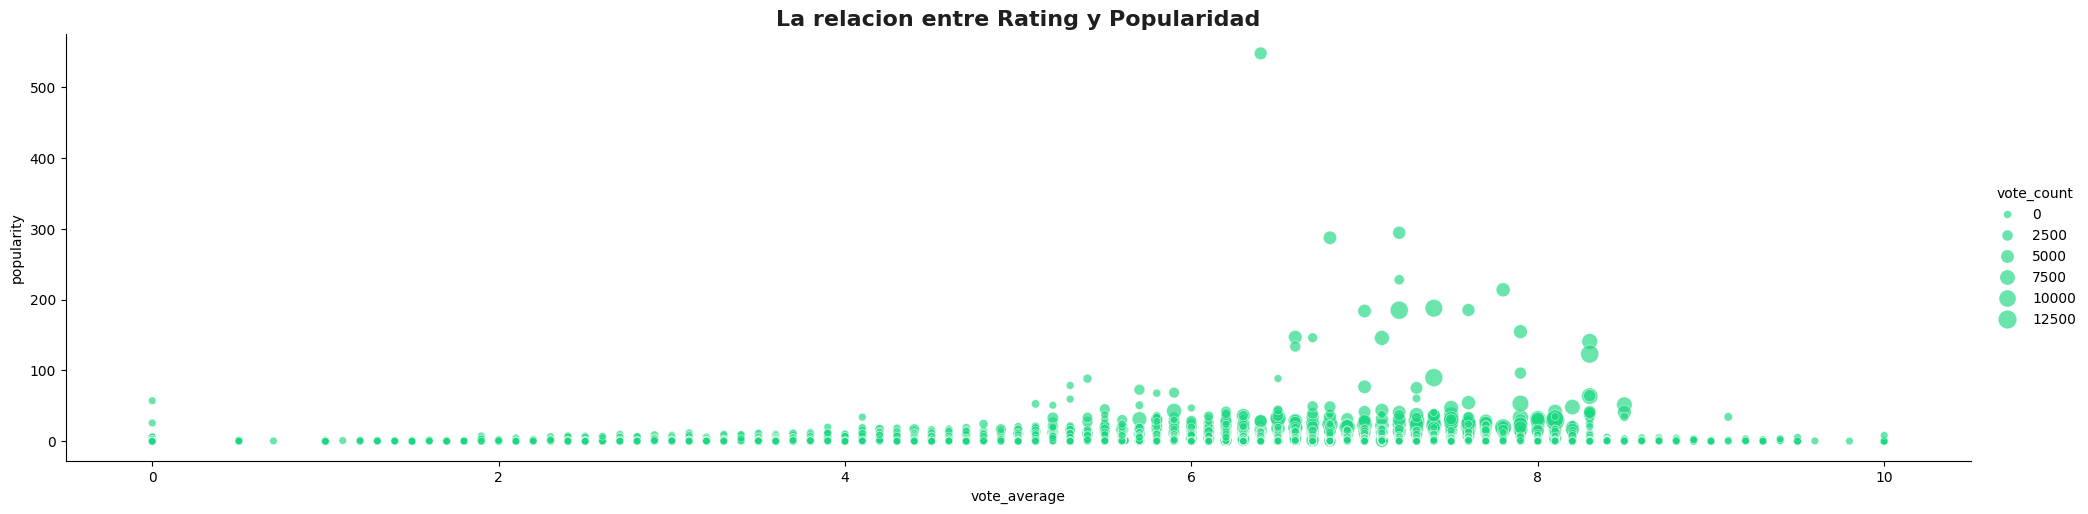

In [116]:
# Con relplot graficamos la relacion entre Rating y Popularidad en base al voto
sns.relplot(
    data=df,
    x="vote_average",
    y="popularity",
    size="vote_count",
    sizes=(30, 190),
    alpha=0.65,
    aspect=4,
    color=generate_rgb(),
    legend="brief",
)
# Agregamos el titulo
plt.title(
    "La relacion entre Rating y Popularidad",
    fontsize=16,
    weight=600,
    color="#1f1f1f",
)

- Las películas que obtuvieron una calificación de 0 o 10 se deben básicamente a un pequeño número de votantes. A medida que aumenta el recuento de votos, lo más probable es que la calificación esté entre 5 y 8,5.
- Está claro que las películas populares obtendrán más votos como se muestra en la trama anterior.

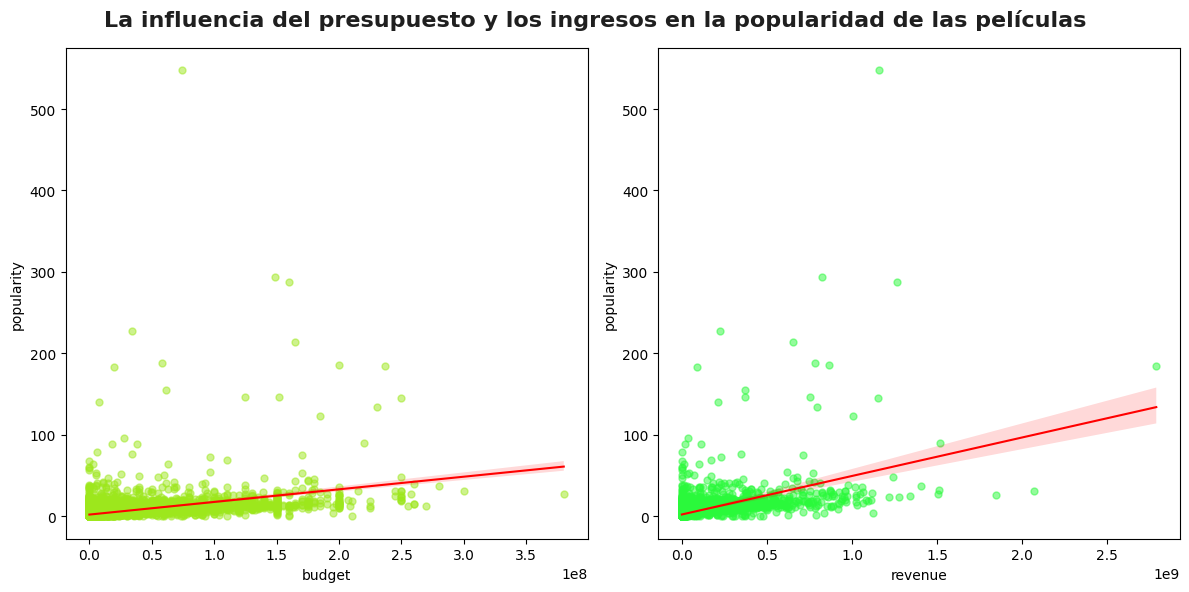

In [117]:
# Definimos el tamaño de la figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Agregamos el titulo
plt.suptitle(
    "La influencia del presupuesto y los ingresos en la popularidad de las películas",
    fontsize=16,
    weight=600,
    color="#1f1f1f",
)

# Graficamos la relacion entre el presupuesto y la popularidad
sns.regplot(
    data=df,
    x="budget",
    y="popularity",
    scatter_kws={"color": generate_rgb(), "alpha": 0.5, "s": 25},
    line_kws={"color": "red", "lw": 1.5},
    ax=axes[0],
)

# Graficamos la relacion entre los ingresos y la popularidad
sns.regplot(
    data=df,
    x="revenue",
    y="popularity",
    scatter_kws={"color": generate_rgb(), "alpha": 0.5, "s": 25},
    line_kws={"color": "red", "lw": 1.5},
    ax=axes[1],
)

plt.tight_layout()

El presupuesto y los ingresos influyen ligeramente en la popularidad de las películas.

<Axes: title={'center': 'Correlacion de las caracteristicas de las peliculas\n'}>

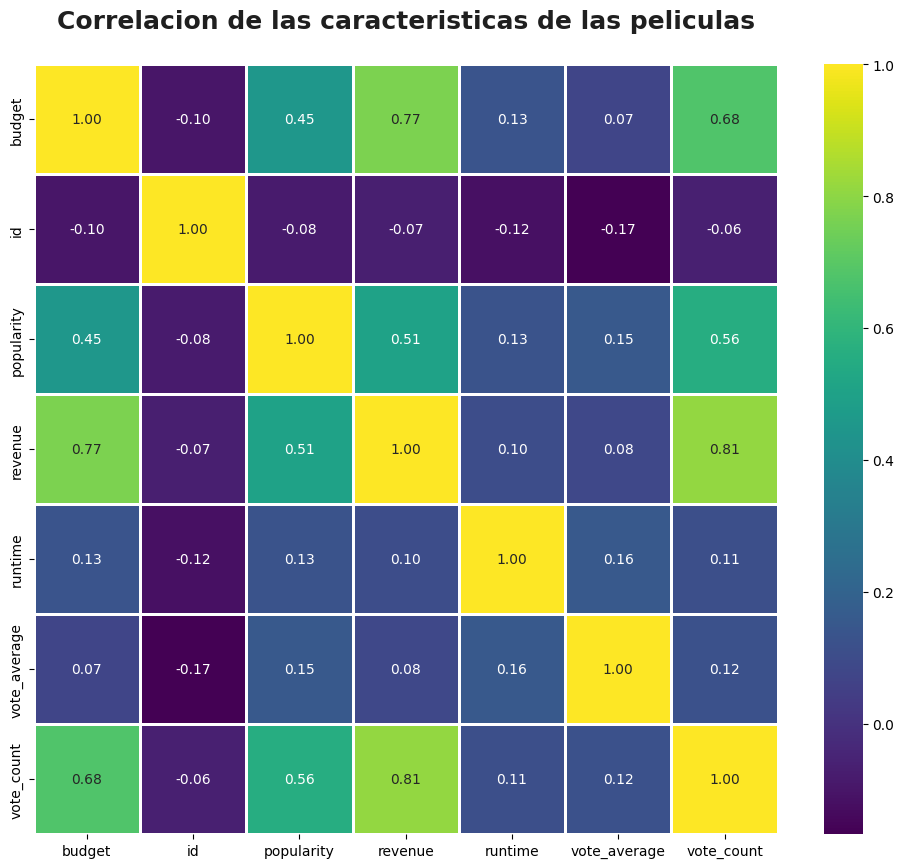

In [118]:
plt.figure(figsize=(12, 10)) #  tamaño de la figura
plt.title(
    "Correlacion de las caracteristicas de las peliculas\n",
    fontsize=18,
    weight=600,
    color="#1f1f1f",
)
# Generamos el mapa de calor
sns.heatmap(
    df.select_dtypes(include=["int64", "float64"]).corr(),  # seleccionamos las columnas numericas
    annot=True, # mostrar los valores
    cmap="viridis", # mapa de colores
    fmt=".2f", # formato de los valores
    linewidths=1, # ancho de las lineas
    linecolor="white", # color de las lineas
)


El recuento de votos, el presupuesto y la popularidad son tres características dominantes que pueden influir significativamente en los ingresos de las películas. Estos factores suelen estar correlacionados con el éxito financiero de una película.